## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [4]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

--2024-01-19 18:45:51--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2024-01-19 18:45:52--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc703c8b4d162d0d21103446ce95.dl.dropboxusercontent.com/cd/0/inline/CLpAZT-y2w_n8HWDek8ntKghuWcPtRJYjtkDclvS2k7TtCztwAIpD_DI0oc1pLlNA-j5t675lA2A2B4JFoRYaXGSjudPnOke3Xc5I9JBps4BpM4pSpvtxxapSmaPF4nNRxY/file# [following]
--2024-01-19 18:45:52--  https://uc703c8b4d162d0d21103446ce95.dl.dropboxusercontent.com/cd/0/inline/CLpAZT-y2w_n8HWDek8ntKghuWcPtRJYjtkDclvS2k7TtCztwAIp

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [18]:
#1
import pandas as pd

df = pd.read_csv("~/data/data_000637.txt")
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


In [19]:
#2
x = df["BX_COUNTER"].max()
print("the max number of BX_COUNTER is:",x)

the max number of BX_COUNTER is: 3563


In [22]:
#3
time = (df["ORBIT_CNT"].max()-df["ORBIT_CNT"].min())*x*25e-9
print("the data taking lasted",time,"seconds")

the data taking lasted 0.9801812999999999 seconds


In [24]:
#4
df["TIME"]=df["ORBIT_CNT"]*x*25e-9 + df["BX_COUNTER"]*25e-9 + df["TDC_MEAS"]*(25/30)*10**-9

In [33]:
#5
import numpy as np
df["HEAD"] = np.random.choice([0,1],size=len(df["HEAD"]))
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
0,0,0,123,3869200167,2374,26,344649.004935
1,0,0,124,3869200167,2374,27,344649.004935
2,0,0,63,3869200167,2553,28,344649.004939
3,1,0,64,3869200167,2558,19,344649.004939
4,0,0,64,3869200167,2760,25,344649.004945
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,344649.985076
1310716,1,1,4,3869211171,763,11,344649.985076
1310717,1,0,64,3869211171,764,0,344649.985076
1310718,0,0,139,3869211171,769,0,344649.985076


In [34]:
#6
df_2 = df[df["HEAD"]==1]
df_2

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
3,1,0,64,3869200167,2558,19,344649.004939
6,1,0,61,3869200167,2772,14,344649.004945
7,1,0,139,3869200167,2776,0,344649.004945
8,1,0,62,3869200167,2774,21,344649.004945
11,1,0,64,3869200167,2786,19,344649.004945
...,...,...,...,...,...,...,...
1310708,1,0,124,3869211171,199,9,344649.985062
1310710,1,1,36,3869211171,427,13,344649.985068
1310715,1,0,62,3869211171,762,14,344649.985076
1310716,1,1,4,3869211171,763,11,344649.985076


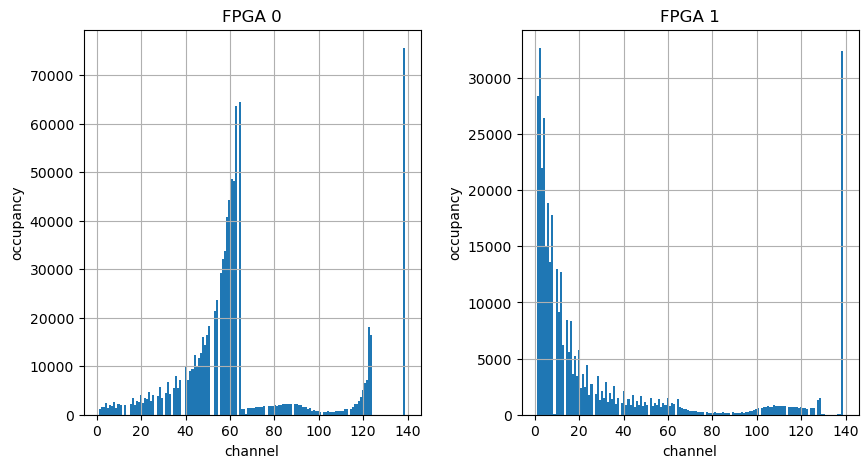

In [40]:
#7
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize=(10,5))
df[df["FPGA"]==0].hist("TDC_CHANNEL",ax = ax[0], bins = df["TDC_CHANNEL"].max()+10)
df[df["FPGA"]==1].hist("TDC_CHANNEL",ax = ax[1], bins = df["TDC_CHANNEL"].max()+10)

for i in range(len(ax)):
    ax[i].set_xlabel("channel")
    ax[i].set_ylabel("occupancy")
    ax[i].set_title("FPGA {}".format(i))



In [60]:
#8
g_fpga = df.groupby("FPGA")

#fpga 0
print("most noicy channels in fpga 0")
g_fpga.get_group(0).value_counts("TDC_CHANNEL").to_frame().head(3)


most noicy channels in fpga 0


,count
TDC_CHANNEL,
139,75617
64,64581
63,63724


In [61]:
#fpga 1
print("most noicy channels in fpga 1")
g_fpga.get_group(1).value_counts("TDC_CHANNEL").to_frame().head(3)

most noicy channels in fpga 1


,count
TDC_CHANNEL,
2,32669
139,32442
1,28438


In [83]:
#9
n_orbit = len(df.value_counts("ORBIT_CNT").to_frame()["count"])
print("the number of orbits is", n_orbit)

n_139_orbit = len(df[df["TDC_CHANNEL"] == 139].value_counts("ORBIT_CNT").to_frame()["count"])
print("the number of orbits with at least 1 count from 139 is:", n_139_orbit)


the number of orbits is 11001
the number of orbits with at least 1 count from 139 is: 10976
